# Needle in a Data Haystack - Introduction to Data Science (67978) 
### The Kendall Irrigation Project Using Data to Analyze Heterogeneity in Irrigation Patterns and 
### Plant Water Uptake


## Introduction
In recent years, many researchers have identified the potential that data science has to
improve resource efficiency and crop yields in agriculture. This is especially true with
respect to irrigation management.

At present, most irrigation decisions are often made
based on the assumption that field conditions are homogenous. Most fields, however,
have internal variations in slope, soil depth and type, and aspect, among other variables.
This variation can affect the distribution of irrigation water, resulting in certain plants
performing better than others.

To this end, a team of researchers at the Volcani Institute is engaged in a
multiyear project aimed at increasing our understanding of how spacial heterogeneity
within an agriculture field affects the distribution of irrigation water, and how this in
turn affects plant production

turn affects plant production.
During 2017-2018, this team conducted a field experiment in a wine vineyard located
within Israel's Judean Hills region (Mevo-Beitar). The area of the vineyard is 2.4 ha
and its terrain is highly variable. The vines in the vineyard were planted in 2011 in
a northwest-to-southeast direction with a vine and row spacing of 1.5 m and 3.0 m,
respectively.
As a part of their ongoing experiment, the researchers divided a section of the vineyard
into 10 "zones". Over the course of the growing season, the different zones were subjected
to different irrigation regimes and the plant health within each of the zones was measured.

The following image shows the 10 areas

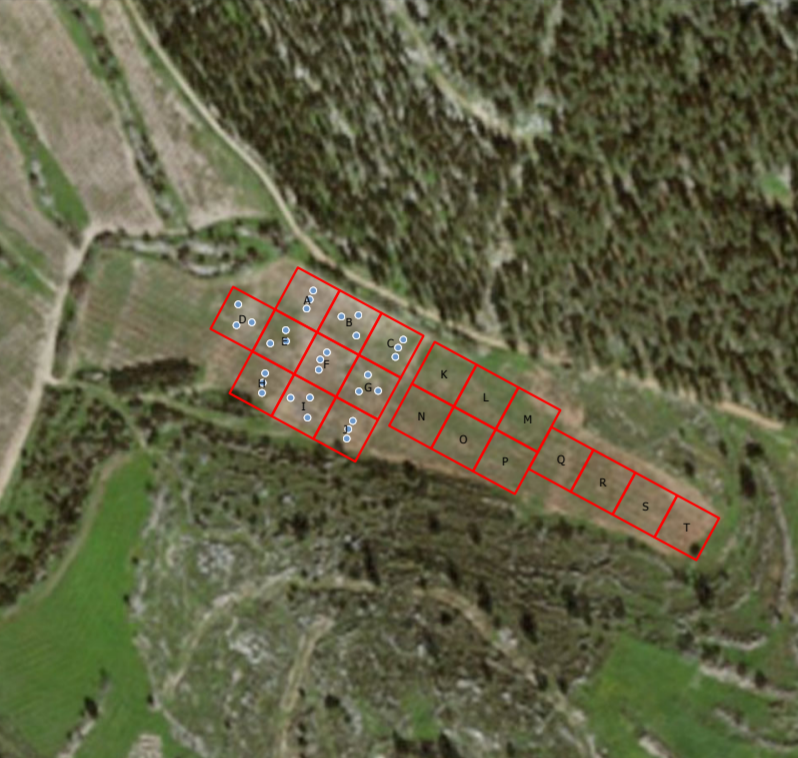

In [19]:
from IPython.display import Image
Image(filename="site_map.png", width=600, height=600)

## Data
Load our data

In [269]:
df = pd.read_csv("TDR_data_clean.txt", parse_dates={'date_time': [0]}, dayfirst = True)
df.columns = (df.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))

df


,date_time,A_VWC_1,A_VWC_2,A_VWC_3,B_VWC_1,B_VWC_2,B_VWC_3,C_VWC_1,C_VWC_2,C_VWC_3,...,C_IRT_3,D_IRT_1,D_IRT_2,D_IRT_3,C_IRbodyT_1,C_IRbodyT_2,C_IRbodyT_3,D_IRbodyT_1,D_IRbodyT_2,D_IRbodyT_3
0,2018-05-01 00:05:00,20.4,24.8,22.7,26.2,24.8,23.5,27.8,24.9,21.7,...,23.1,22.9,22.7,22.6,22.9,23.0,23.2,23.0,22.6,22.5
1,2018-05-01 00:10:00,20.0,24.7,22.6,25.2,25.2,25.1,26.9,23.8,21.8,...,23.2,23.1,22.9,22.8,22.9,23.0,23.2,23.1,22.7,22.6
2,2018-05-01 00:15:00,19.6,25.2,23.4,25.9,25.1,23.9,27.4,25.1,20.9,...,23.2,23.2,23.0,22.9,23.0,23.1,23.2,23.2,22.8,22.8
3,2018-05-01 00:20:00,21.5,24.3,21.6,25.4,25.1,23.8,27.3,25.0,22.0,...,23.2,23.2,23.0,23.0,23.0,23.1,23.2,23.2,22.9,22.8
4,2018-05-01 00:25:00,20.4,24.2,21.2,25.9,25.1,22.3,26.4,23.9,21.5,...,23.1,23.1,22.9,22.8,22.9,23.0,23.2,23.3,23.0,22.9
5,2018-05-01 00:30:00,20.1,24.7,22.0,25.8,25.1,23.1,27.1,24.9,21.8,...,23.0,23.1,22.9,22.7,22.8,22.9,23.2,23.2,23.0,22.8
6,2018-05-01 00:35:00,20.0,24.4,21.7,26.3,25.0,23.8,26.8,24.7,21.3,...,23.0,23.0,22.9,22.7,22.7,22.9,23.1,23.2,22.9,22.8
7,2018-05-01 00:40:00,19.4,24.1,20.9,26.2,24.9,22.6,27.8,25.1,22.3,...,23.0,22.9,22.8,22.7,22.7,22.8,23.1,23.2,22.9,22.7
8,2018-05-01 00:45:00,20.4,24.7,22.2,25.5,25.1,22.8,27.1,25.0,21.4,...,23.0,22.8,22.8,22.6,22.6,22.8,23.1,23.1,22.8,22.6
9,2018-05-01 00:50:00,20.3,23.3,22.5,26.3,24.3,23.2,28.2,25.5,21.5,...,22.9,22.9,22.8,22.7,22.6,22.8,23.1,23.2,22.8,22.7


## Explore the data

In [395]:
df['date'] = pd.to_datetime(df['date_time'])
my_data = df.set_index(df.date)


In [426]:
import dash_core_components as dcc
import ipywidgets as wg
from IPython.display import display, clear_output
from plotly.widgets import GraphWidget


area_option = wg.Dropdown(
    options=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    description='Area:',
    disabled=False,
)


field_option = wg.Dropdown(
    options=['VWC', 'Soil_Temperature', 'Permitivity', 'BulkEC'],
    description='Field:',
    disabled=False,
)

sensor_option = wg.Dropdown(
    options=['1', '2', '3'],
    description='Sensor:',
    disabled=False,
)


container = wg.HBox(children=[area_option, sensor_option, field_option])




In [421]:

layout_1 = go.Layout(
    title='Time vs Measurementt',
    xaxis=dict(
        title='Time'
         titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
    ),
    yaxis=dict(
        title='Measurement'
         titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
    )
)


first_graph = py.plot({'data': [go.Scatter(x= my_data['date_time'], y= my_data[area_option.value + "_" 
      + field_option.value + "_" + sensor_option.value])], 'layout': layout_1}, filename = 'widget template2', auto_open=False)                                   
               

g_data = GraphWidget(first_graph)

In [422]:

def response(change):

    g_data.restyle({

          'y': [my_data[area_option.value + "_" + field_option.value + "_" + sensor_option.value]]  
    })
    
                                                                        

In [423]:
area_option.observe(response, names="value")
field_option.observe(response, names="value")
sensor_option.observe(response, names="value")


display(container)



HBox(children=(Dropdown(description='Area:', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), value='A'), Dropdown(description='Sensor:', options=('1', '2', '3'), value='1'), Dropdown(description='Field:', options=('VWC', 'Soil_Temperature', 'Permitivity', 'BulkEC'), value='VWC')))

In [424]:
display(g_data)

GraphWidget()

## Clean the data

In [428]:
# Import csv file with proper datetime format
df_no_nan = pd.read_csv("nan_reduced.txt", parse_dates={'date_time': [0]}, dayfirst = True)

# Edit column header names to enable splitting later on
df_no_nan.columns = (df_no_nan.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))

df_no_nan

,date_time,A_VWC_1,A_VWC_2,A_VWC_3,B_VWC_1,B_VWC_2,B_VWC_3,C_VWC_2,C_VWC_3,D_VWC_1,...,D_BulkEC_3,E_BulkEC_1,E_BulkEC_3,F_BulkEC_1,F_BulkEC_2,F_BulkEC_3,G_BulkEC_1,H_BulkEC_1,I_BulkEC_1,I_BulkEC_3
0,2018-05-03 00:00:00,21.8,25.3,23.0,26.2,25.6,25.1,25.4,21.8,22.9,...,638.0,267.0,320.0,488.0,335.0,0.0,303.0,475.0,323.0,404.0
1,2018-05-03 00:05:00,21.7,25.2,22.8,26.3,25.8,24.8,25.5,21.9,23.0,...,640.0,267.0,320.0,489.0,335.0,0.0,303.0,475.0,323.0,404.0
2,2018-05-03 00:10:00,21.7,25.2,22.7,26.3,25.7,25.1,25.5,21.9,22.9,...,638.0,266.0,321.0,489.0,335.0,0.0,303.0,474.0,323.0,404.0
3,2018-05-03 00:15:00,21.8,25.3,22.8,26.3,25.8,25.1,25.6,22.0,22.9,...,640.0,267.0,321.0,488.0,335.0,0.0,303.0,474.0,322.0,404.0
4,2018-05-03 00:20:00,21.9,25.2,22.7,26.2,25.7,24.8,25.5,22.0,22.9,...,638.0,267.0,320.0,489.0,335.0,0.0,303.0,475.0,322.0,403.0
5,2018-05-03 00:25:00,21.8,25.2,22.7,26.3,25.7,24.9,25.5,22.0,22.8,...,637.0,266.0,320.0,489.0,335.0,0.0,303.0,475.0,322.0,404.0
6,2018-05-03 00:30:00,21.8,25.2,22.8,26.2,25.8,24.8,25.5,21.8,22.9,...,637.0,266.0,320.0,488.0,335.0,0.0,302.0,475.0,322.0,405.0
7,2018-05-03 00:35:00,21.7,25.3,22.8,26.1,25.8,24.8,25.5,22.0,23.0,...,638.0,266.0,320.0,489.0,335.0,0.0,302.0,475.0,322.0,404.0
8,2018-05-03 00:40:00,21.6,25.3,22.6,26.2,25.7,24.9,25.5,22.0,22.8,...,638.0,266.0,320.0,489.0,335.0,0.0,302.0,475.0,321.0,405.0
9,2018-05-03 00:45:00,21.8,25.3,22.9,26.2,25.7,24.9,25.5,21.9,22.9,...,638.0,266.0,320.0,488.0,334.0,0.0,302.0,473.0,321.0,404.0


## Time vs VWC

Load the Volumetric Water Content data

In [28]:

import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import cufflinks as cf


# Import csv file with proper datetime format
df_vwc = pd.read_csv("TDR_data_clean_VWC.txt", parse_dates={'date_time': [0]}, dayfirst = True)

# Edit column header names to enable splitting later on
df_vwc.columns = (df_vwc.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))


In [29]:
%matplotlib notebook



from ipywidgets import interact


layout = go.Layout(
    title='Time vs Volumetric Water Content',
    xaxis=dict(
        title='Time'
         titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
    ),
    yaxis=dict(
        title='VWC'
         titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
    )
)


A_url = py.plot({'data': [go.Scatter(x= df_vwc['date_time'], y= df_vwc["A_VWC_1"], name='Sensor_1'),
                          go.Scatter(x= df_vwc['date_time'], y= df_vwc["A_VWC_2"], name='Sensor_2'),
                       go.Scatter(x= df_vwc['date_time'], y= df_vwc["A_VWC_3"], name='Sensor_3')], 'layout': layout}, 
               filename = 'widget template1', auto_open=False)


w1 = wg.Dropdown(
    options=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    description='Area:',
    disabled=False,
)

g = GraphWidget(A_url)

The draw time for this plot will be slow for all clients.


C:\Users\karin\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



This function is called whenever the selection is changed. The graph is displayed according to user selection

In [30]:

def update_on_change(change):
    
    new_area = change['new']
   
    g.restyle({
          'y': [df_vwc[new_area + "_VWC_1"],
                  df_vwc[new_area + "_VWC_2"],
               df_vwc[new_area + "_VWC_3"]],
      }, indices=[0, 1, 2])
    
   

Select the area you want to explore

In [31]:
w1.observe(update_on_change, names="value")

display(w1)
display(g)



Dropdown(description='Area:', options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), value='A')

GraphWidget()

## Time vs Irriugation

Load the irrigation data

In [25]:
import time
import datetime

irrigation_df = pd.read_csv("Irrigation.txt", parse_dates={'date_time': [0]}, dayfirst = True)

irrigation_df['date'] = pd.to_datetime(irrigation_df['date_time'])

In [26]:


t1 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['A'],
    name='Irrigation area A'
)

t2 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['B'],
    name='Irrigation area B'
)

t3 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['C'],
    name='Irrigation area C'
)

t4 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['D'],
    name='Irrigation area D'
)

t5 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['E'],
    name='Irrigation area E'
)

t6 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['F'],
    name='Irrigation area F'
)

t7 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['G'],
    name='Irrigation area G'
)

t8 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['H'],
    name='Irrigation area H'
)

t9 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['I'],
    name='Irrigation area I'
)

t10 = go.Bar(
   x=irrigation_df['date'],
    y=irrigation_df['J'],
    name='Irrigation area J'
)

data = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10]

layout = go.Layout( title='Time vs Irrigation',
    xaxis=dict(
        title='Time',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Irrigation',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ))




fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='time vs irrigation')

The draw time for this plot will be slow for all clients.


C:\Users\karin\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



## Time vs SWP

Load the Stem Water Potential data

In [ ]:
# Import csv file with proper datetime format
df_swp = pd.read_csv("SWP_by_Sensor.csv", parse_dates={'date_time': [0]}, dayfirst = True)

# Edit column header names to enable splitting later on
df_swp.columns = (df_swp.columns.str.replace(' ', '_').str.replace('(', '')
              .str.replace(')', '') .str.replace(',', '').str.replace('\'', '')
              .str.replace('Interface', '').str.replace('Sensor_', ''))


to be continue..

## DTW distances matrix

<IPython.core.display.Javascript object>


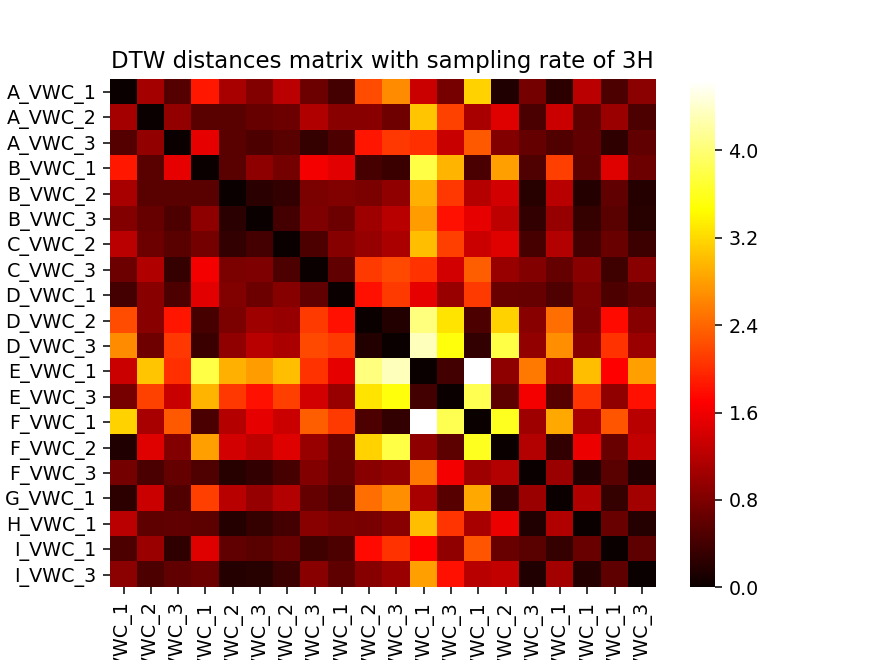

In [430]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from dtw import accelerated_dtw
from enum import Enum


class Distances:
    debug = True

    # noinspection SpellCheckingInspection
    @staticmethod
    def dtw_matrix(dataframe, sampling_rate='2H'):
        """Returns a data frame containing dynamic time warping (DTW) distances matrix of the input data frame.
            The data must not contain any NaN values.
            Args:
                :param dataframe: a data frame containing the data columns we want to compare
                :type dataframe: pandas.DataFrame

                :param sampling_rate:
                :type sampling_rate: str

            :return: a data frame containing dynamic time warping (DTW) distances matrix of the input data frame.
            :rtype: object
        """

        assert (not dataframe.isna().values.any()), "The data frame must not contain any NaN values"

        df_downsampled = dataframe.resample(sampling_rate).mean()
        values = df_downsampled.values.T
        num_interfaces, _ = values.shape
        distances_matrix = np.zeros((num_interfaces, num_interfaces))
        for i in range(num_interfaces):
            for j in range(i + 1, num_interfaces):
                d, _, _, _ = accelerated_dtw(values[i, :], values[j, :], dist=lambda x, y: np.abs(x - y))
#                 if Distances.debug:
#                     print("Finsihed comparing", dataframe.columns[i], "and", dataframe.columns[j])
                distances_matrix[i, j] = distances_matrix[j, i] = d
            # Convert into a data frame
        distances_matrix_df = (lambda v, c: pd.DataFrame(v, c, c))(distances_matrix, dataframe.columns)
        return distances_matrix_df

    # noinspection SpellCheckingInspection
    @staticmethod
    def p_norm(dataframe, p=2, matrix_dist=False):
        """ Returns a data frame containing p-norm distances matrix of the input data frame.
            The data must not contain any NaN values.

            Args:
                :param dataframe: a data frame containing the data columns we want to compare
                :type dataframe: pandas.DataFrame

                :param p: determines which p-norm to use (defaults to 2, and has to be >= 1)
                :type p: int (optional; defaults to 2)

                :param matrix_dist: if it is true, the data frame is treated as a collection of 3-columned matrices
                :type matrix_dist: bool (optional; defaults to False)

            :return: a data frame containing p-norm distances matrix of the input data frame.
            :rtype: pandas.DataFrame
        """

        assert (p >= 1 and p == int(p)), "p has to be an int >= 1"
        assert (not dataframe.isna().values.any()), "The data frame must not contain any NaN values"

        if not matrix_dist:
            # We use the transpose values matrix so the columns become row vectors for pdist
            values = dataframe.values.T
            new_cols = dataframe.columns

        else:
            num_cols = len(dataframe.columns.tolist())
            values = dataframe.values.T.reshape(int(num_cols / 3), -1)
            original_cols = dataframe.columns.tolist()
            new_cols = pd.Index(sorted(list(set([title[0] + title[-1] for title in original_cols]))))

        # calculate distances
        distances_matrix = squareform(pdist(values, metric='minkowski', p=p))
        # Convert into a data frame
        distances_matrix_df = (lambda v, c: pd.DataFrame(v, c, c))(distances_matrix, new_cols)
        return distances_matrix_df


def get_new_cols(original_cols):
    new_cols = [original_cols[0]]
    interfaces = [c + '_' for c in "ABCDEFGHI"]
    for interface in interfaces:
        for ind in ['_1', '_2', '_3']:
            for meas in ['VWC', 'Soil_Temperature', 'BulkEC']:
                new_col_title = interface + meas + ind
                if new_col_title in original_cols:
                    new_cols.append(new_col_title)
    return new_cols


class TestCase(Enum):
    VWC_P_NORM = 1
    FULL_DATA_P_NORM = 2
    VWC_DTW = 3


# Simple example
if __name__ == "__main__":

    # change this number to try different tests (see the TestCase class enumeration)
    tc = 3

    if tc == TestCase.VWC_P_NORM.value:
        # Import csv file with proper datetime format
        df = pd.read_csv("nan_reduced_VWC.txt", parse_dates={'date_time': [0]}, dayfirst=True)

        # Edit column header names to enable splitting later on
        df.columns = (df.columns.str.replace(' ', '_').str.replace('(', '')
                      .str.replace(')', '').str.replace(',', '').str.replace('\'', '')
                      .str.replace('Interface', '').str.replace('Sensor_', ''))

        # remove first column (date-time)
        df_no_date = df.drop(df.columns[0], axis=1)
        # we interpolate the dataframe in order to replace NaN values
        df_no_date_interpolated = df_no_date.interpolate()

        euclidean_dists_df = Distances.p_norm(df_no_date_interpolated)
        plt.figure()
        sns.heatmap(euclidean_dists_df, cmap="hot")
        plt.title("Euclidean distances matrix - VWC data")
        plt.show()

        L1_dists_df = Distances.p_norm(df_no_date_interpolated, p=1)
        plt.figure()
        sns.heatmap(L1_dists_df, cmap="hot")
        plt.title("L1 distances matrix - VWC data")
        plt.show()

    elif tc == TestCase.FULL_DATA_P_NORM.value:
        df2 = pd.read_csv("nan_reduced_no_permitivity.txt", parse_dates={'date_time': [0]}, dayfirst=True)

        # Edit column header names to enable splitting later on
        df2.columns = (df2.columns.str.replace(' ', '_').str.replace('(', '')
                       .str.replace(')', '').str.replace(',', '').str.replace('\'', '')
                       .str.replace('Interface', '').str.replace('Sensor_', ''))

        original_cols = df2.columns.tolist()
        new_cols = get_new_cols(original_cols)
        df2 = df2[new_cols]
        df2_no_date = df2.drop(df2.columns[0], axis=1)
        df2_no_date_interpolated = df2_no_date.interpolate()

        euclidean_dists_df2 = Distances.p_norm(df2_no_date_interpolated, matrix_dist=True)
        plt.figure()
        sns.heatmap(euclidean_dists_df2, cmap="hot")
        plt.title("Euclidean distances matrix - full data")
        plt.show()

    elif tc == TestCase.VWC_DTW.value:
        # Import csv file with proper datetime format
        df3 = pd.read_csv("nan_reduced_VWC.txt", parse_dates={'date_time': [0]}, dayfirst=True)

        # Edit column header names to enable splitting later on
        df3.columns = (df3.columns.str.replace(' ', '_').str.replace('(', '')
                       .str.replace(')', '').str.replace(',', '').str.replace('\'', '')
                       .str.replace('Interface', '').str.replace('Sensor_', ''))

        df3 = df3.set_index('date_time')

        # we interpolate the dataframe in order to replace NaN values
        df3_interpolated = df3.interpolate()

        SAMPLING_RATE = '3H'
        dtw_df = Distances.dtw_matrix(df3_interpolated, SAMPLING_RATE)
        dtw_df.to_pickle('dtw_distances_' + SAMPLING_RATE + '_sampling.pkl')
        plt.figure()
        sns.heatmap(dtw_df, cmap="hot")
        plt.title("DTW distances matrix with sampling rate of " + SAMPLING_RATE)
        plt.show()



## Hierarchical clustering

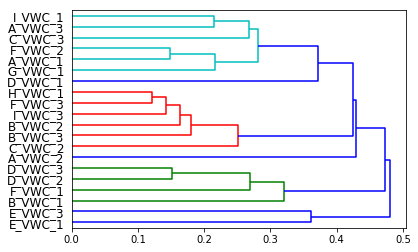

In [103]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

df2 = pd.read_pickle('dtw_distances_H_sampling.pkl')
condensed_distance_matrix = squareform(df2.values)
Z = linkage(condensed_distance_matrix, metric='precomputed')
dendrogram(Z, orientation='right', labels=df2.columns.tolist())

plt.show()
